# 2. Accessing Text Corpora and Lexical Resources

In [1]:
import nltk
from nltk.corpus import gutenberg

In [2]:
emma = nltk.Text(gutenberg.words('austen-emma.txt'))
print(emma)

<Text: Emma by Jane Austen 1816>


In [3]:
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [5]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [7]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [8]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [9]:
cfd = nltk.ConditionalFreqDist((genre, word) for genre in brown.categories() for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [11]:
from nltk.corpus import reuters
reuters.fileids()
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [12]:
reuters.words(categories=['barley', 'corn'])

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

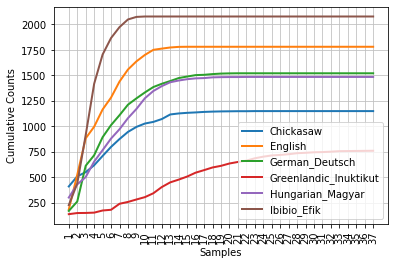

In [13]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist((lang, len(word)) for lang in languages for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)


In [14]:
raw = gutenberg.raw("burgess-busterbrown.txt")
print(raw[1:20])
words = gutenberg.words("burgess-busterbrown.txt")
print(words[1:20])
sents = gutenberg.sents("burgess-busterbrown.txt")
print(sents)

The Adventures of B
['The', 'Adventures', 'of', 'Buster', 'Bear', 'by', 'Thornton', 'W', '.', 'Burgess', '1920', ']', 'I', 'BUSTER', 'BEAR', 'GOES', 'FISHING', 'Buster', 'Bear']
[['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', 'by', 'Thornton', 'W', '.', 'Burgess', '1920', ']'], ['I'], ...]


In [21]:
from nltk.corpus import PlaintextCorpusReader
wordlists = PlaintextCorpusReader('', '.*') 
wordlists.fileids()
wordlists.words('test1.txt')

['adsad', 'asd', '.']

In [37]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist((lang, len(word)) for lang in languages for word in udhr.words(lang + '-Latin1'))
cfd.tabulate(conditions=['English', 'German_Deutsch', 'Chickasaw'], samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 
     Chickasaw    0  411  510  551  619  710  799  876  946  995 


In [40]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()
        
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [50]:
print(cfd['the'].most_common(20))
print(cfd['of'].most_common(20))
generate_model(cfd, 'of')

[('land', 156), ('LORD', 154), ('earth', 105), ('sons', 69), ('name', 42), ('field', 39), ('men', 36), ('man', 34), ('waters', 30), ('children', 30), ('house', 27), ('days', 26), ('daughter', 25), ('ground', 24), ('ark', 24), ('face', 23), ('city', 23), ('place', 22), ('morning', 20), ('son', 19)]
[('the', 372), ('his', 74), ('my', 52), ('Egypt', 46), ('Canaan', 38), ('all', 36), ('thy', 25), ('it', 21), ('a', 18), ('Jacob', 17), ('God', 16), ('heaven', 16), ('every', 15), ('Pharaoh', 15), ('their', 14), ('your', 13), ('Esau', 13), ('them', 12), ('that', 12), ('Abraham', 12)]
of the land of the land of the land of the land of the land 

In [57]:
from nltk.corpus import swadesh
swadesh.fileids()
swadesh.words('en')
fr2en = swadesh.entries(['en', 'ca'])
translate = dict(fr2en)
translate['dog']

'gos'

In [59]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [61]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [62]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [66]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [67]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']